In [2]:
import os
import json
from pprint import pprint
import numpy as np
from ujson import load as json_load
import collections
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:
def load_dev(filepath):
    data = json.load(open(filepath))
    truth_dict = {}
    for k, v in data.items():
        truth_dict[v['uuid']] = {'answers': v['answers'], 'question':v['question']}
    return truth_dict
        

In [5]:
# data = json.load(open('data/dev_eval.json'))
# keys = {str(x) for x in range(1, 10)}
# mini_data = {k:v for k,v in data.items() if k in keys}
# pprint(mini_data)
data = load_dev('data/dev_eval.json')
keys_list = []
for k, v in data.items():
    keys_list.append(k)
    if len(keys_list)==10:
        break
print(keys_list)
keys = keys_list[:1]
mini_data = {k:v for k,v in data.items() if k in keys}
pprint(mini_data)
# pprint(data)

['68cf05f67fd29c6f129fe2fb9', 'f5fead9187d56af2bdbfcb921', 'f9183ead5bb93aaa12ea37245', '1fc4da46445c2c1c2dc0ddeda', '1be9fa378cbee6d9fa8b6ac78', 'c42edddd0f45b968cc4c512e5', 'd583847c96cbbbfaaa99dfcad', 'e06fbbdb50af7ab3faefde618', 'cbb48eaacbbbfcccefb7aab7f', '6d2fff36bcac0ea0e689a5a31']
{'68cf05f67fd29c6f129fe2fb9': {'answers': ['France',
                                           'France',
                                           'France',
                                           'France'],
                               'question': 'In what country is Normandy '
                                           'located?'}}


In [8]:
import csv
#preds = json.load(open('predictions.json'))
preds = {}
with open('./save/test/ensemble-06/submission.csv', newline='', encoding='utf-8') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    count = 0
    for row in spamreader:
        if count ==0:
            count += 1
        else:
            preds[row[0]] = row[1]

#pprint(preds)
keys_list = []
for k, v in preds.items():
    keys_list.append(k)
    if len(keys_list)==10:
        break
print(keys_list)

['001fefa37a13cdd53fd82f617', '00415cf9abb539fbb7989beba', '00a4cc38bd041e9a4c4e545ff', '00bafbca5f0d7f61e00a41cb5', '00d60faa383c8a6beffbc2bff', '00e4a6dbb04af0134ee29ce6f', '011cbedf80fae8444eb3c95ce', '01541dd84dafb8143adaa74aa', '0170d2c5639a82ee5e1744cfd', '019ccc77acb5f4a5d1f24cf70']


In [9]:
def load_pred(filepath):
    preds = {}
    with open(filepath, newline='', encoding='utf-8') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        count = 0
        for row in spamreader:
            if count ==0:
                count += 1
            else:
                preds[row[0]] = row[1]
    return preds

In [10]:
from __future__ import print_function
from collections import Counter
import string
import re
import argparse
import json
import sys

In [11]:
def normalize_answer(s):
    """Lower text and remove punctuation, articles and extra whitespace."""
    def remove_articles(text):
        return re.sub(r'\b(a|an|the)\b', ' ', text)

    def white_space_fix(text):
        return ' '.join(text.split())

    def remove_punc(text):
        exclude = set(string.punctuation)
        return ''.join(ch for ch in text if ch not in exclude)

    def lower(text):
        return text.lower()

    return white_space_fix(remove_articles(remove_punc(lower(s))))

In [12]:

def get_tokens(s):
    if not s:
        return []
    return normalize_answer(s).split()

def compute_em(a_gold, a_pred):
    return int(normalize_answer(a_gold) == normalize_answer(a_pred))

def compute_f1(a_gold, a_pred):
    gold_toks = get_tokens(a_gold)
    pred_toks = get_tokens(a_pred)
    common = Counter(gold_toks) & Counter(pred_toks)
    num_same = sum(common.values())
    if len(gold_toks) == 0 or len(pred_toks) == 0:
        # If either is no-answer, then F1 is 1 if they agree, 0 otherwise
        return int(gold_toks == pred_toks)
    if num_same == 0:
        return 0
    precision = 1.0 * num_same / len(pred_toks)
    recall = 1.0 * num_same / len(gold_toks)
    f1 = (2 * precision * recall) / (precision + recall)
    return f1

def compute_avna(prediction, ground_truths):
    """Compute answer vs. no-answer accuracy."""
    return float(bool(prediction) == bool(ground_truths))

def metric_max_over_ground_truths(metric_fn, prediction, ground_truths):
    if not ground_truths:
        return metric_fn(prediction, '')
    scores_for_ground_truths = []
    for ground_truth in ground_truths:
        score = metric_fn(prediction, ground_truth)
        scores_for_ground_truths.append(score)
    return max(scores_for_ground_truths)


In [10]:
# def evaluate(dataset, predictions):
#     output_dict = {}
#     f1 = exact_match = total = 0
#     for article in dataset:
#         for paragraph in article['paragraphs']:
#             for qa in paragraph['qas']:
#                 total += 1
#                 if qa['id'] not in predictions:
#                     message = 'Unanswered question ' + qa['id'] + \
#                               ' will receive score 0.'
#                     print(message, file=sys.stderr)
#                     continue
#                 ground_truths = list(map(lambda x: x['text'], qa['answers']))
#                 prediction = predictions[qa['id']][0]
#                 len_answer = len(prediction.split(' '))
#                 exact_match += metric_max_over_ground_truths(
#                     exact_match_score, prediction, ground_truths)
#                 f1 += metric_max_over_ground_truths(
#                     f1_score, prediction, ground_truths)
                
#                 question = qa['question']
#                 em_yn = metric_max_over_ground_truths(
#                     exact_match_score, prediction, ground_truths)
# #                 em_score = exact_match_score(prediction, ground_truths)
#                 if em_yn==True:
#                     append = 1
#                 else:
#                     append = 0
#                 output_dict[question] = [append, len_answer]

#     exact_match = 100.0 * exact_match / total
#     f1 = 100.0 * f1 / total
    
#     print("Exact Match:", exact_match)
#     print("F1: ", f1)

#     return output_dict

In [13]:
def eval_dicts(gold_dict, pred_dict, no_answer):
    avna = f1 = em = total = 0
    dict_quest = {}
    for key, value in pred_dict.items():
        total += 1
        ground_truths = gold_dict[key]['answers']
#         print(key)
#         print("prediction = ", value)
#         print("ground_truth = ", ground_truths)
        prediction = value
        em1 = metric_max_over_ground_truths(compute_em, prediction, ground_truths)
        f11 = metric_max_over_ground_truths(compute_f1, prediction, ground_truths)
        
        em += em1
        f1 += f11
        
        if no_answer:
            avna1 = compute_avna(prediction, ground_truths)
            avna += avna1
        
        dict_quest[key] = {'EM': em1, 'F1':f11, 'AvNA':avna1, 'question':gold_dict[key]['question']}
#         if total<10:
#             print(dict_quest[key])
    eval_dict = {'EM': 100. * em / total,
                 'F1': 100. * f1 / total}

    if no_answer:
        eval_dict['AvNA'] = 100. * avna / total

    return eval_dict, dict_quest

In [19]:
dataset_file = 'data/dev_eval.json'
dataset = load_dev(dataset_file)
#dataset = dataset_json['data']

# predictions_file = 'predictions.json'
# predictions = json.load(open(predictions_file))
# output_dict = json.dumps(evaluate(dataset, predictions))

# dict_ques = json.loads(output_dict)
pred_file = './save/test/ensemble-06/submission.csv'
preds = load_pred(pred_file)
eval_dict, dict_ques = eval_dicts(dataset, preds, 1)
#print(dict_ques)
baseline_file = './save/test/baseline-02/dev_submission.csv'

### By Question Type

In [20]:
def question_type_analysis(pred_file):

    predictions = load_pred(pred_file)
    output_dict, dict_ques = eval_dicts(dataset, predictions, 1)

    
    quest_dist = collections.defaultdict(dict)
    for k, v in dict_ques.items():
        #print("k, v = ", k, v)
        ques = v['question']
        ques = ques.lower()
        fw = ques.split(' ')[0]
    #     print(fw)
        if fw in quest_dist:
            quest_dist[fw]['total'] +=1.0
            quest_dist[fw]['em1'] += v['EM']
            quest_dist[fw]['f11'] += v['F1']
            quest_dist[fw]['avna1'] += v['AvNA']
            
        else:
            quest_dist[fw]['total'] = 1.0
            quest_dist[fw]['em1'] = v['EM']
            quest_dist[fw]['f11'] = v['F1']
            quest_dist[fw]['avna1'] = v['AvNA']
    
    for fw,_ in quest_dist.items():
        quest_dist[fw]['em'] = quest_dist[fw]['em1']*1.0/quest_dist[fw]['total']
        quest_dist[fw]['f1'] = quest_dist[fw]['f11']*1.0/quest_dist[fw]['total']
        quest_dist[fw]['avna'] = quest_dist[fw]['avna1']*1.0/quest_dist[fw]['total']
    return quest_dist

In [21]:

main_ques = ['what','who','how','which','when','where','why']
x_axis = main_ques[:]
x_axis.append('other')
que2idx = {}
for i, q in enumerate(main_ques):
    que2idx[q] = i


In [23]:
quest_dict = question_type_analysis(pred_file)
quest_dict_baseline = question_type_analysis(baseline_file)


print('our model')
for q in main_ques:
    print(q, quest_dict[q])

print('baseline')

for q in main_ques:
    print(q, quest_dict_baseline[q])

our model
what {'total': 2609.0, 'em1': 1748, 'f11': 1839.3255275089148, 'avna1': 2006.0, 'em': 0.6699885013415101, 'f1': 0.7049925364158355, 'avna': 0.7688769643541586}
who {'total': 544.0, 'em1': 379, 'f11': 391.93116883116886, 'avna1': 412.0, 'em': 0.6966911764705882, 'f1': 0.7204617074102369, 'avna': 0.7573529411764706}
how {'total': 502.0, 'em1': 292, 'f11': 316.3980983000488, 'avna1': 361.0, 'em': 0.5816733067729084, 'f1': 0.6302750962152366, 'avna': 0.7191235059760956}
which {'total': 134.0, 'em1': 83, 'f11': 90.86190476190477, 'avna1': 103.0, 'em': 0.6194029850746269, 'f1': 0.6780739161336177, 'avna': 0.7686567164179104}
when {'total': 380.0, 'em1': 267, 'f11': 275.36996336996344, 'avna1': 295.0, 'em': 0.7026315789473684, 'f1': 0.724657798342009, 'avna': 0.7763157894736842}
where {'total': 209.0, 'em1': 127, 'f11': 138.75516062884486, 'avna1': 154.0, 'em': 0.6076555023923444, 'f1': 0.6639002900901668, 'avna': 0.7368421052631579}
why {'total': 79.0, 'em1': 43, 'f11': 50.48477264

In [24]:
f1_scores = [0]*(len(main_ques)+1)
em_scores = [0]*(len(main_ques)+1)
avna_scores = [0]*(len(main_ques)+1)


total, f1, em, avna = 0, 0, 0, 0
for ques in quest_dict:
    if ques in main_ques:
        f1_scores[que2idx[ques]] = quest_dict[ques]['f1']
        em_scores[que2idx[ques]] = quest_dict[ques]['em']
        avna_scores[que2idx[ques]] = quest_dict[ques]['avna']
        #print(quest_dict[ques]['f1'], quest_dict[ques]['total'])
    else:
        total += quest_dict[ques]['total']
        f1 += quest_dict[ques]['total']*quest_dict[ques]['f1']
        em += quest_dict[ques]['total']*quest_dict[ques]['em']
        avna += quest_dict[ques]['total']*quest_dict[ques]['avna']
#for ques in x_axis:
    
f1_scores[-1] = f1/total
em_scores[-1] = em/total
avna_scores[-1] = avna/total


base_f1_scores = [0]*(len(main_ques)+1)
base_em_scores = [0]*(len(main_ques)+1)
base_avna_scores = [0]*(len(main_ques)+1)
total, f1, em, avna = 0, 0, 0, 0
for ques in quest_dict_baseline:
    if ques in main_ques:
        base_f1_scores[que2idx[ques]] = quest_dict_baseline[ques]['f1']
        base_em_scores[que2idx[ques]] = quest_dict_baseline[ques]['em']
        base_avna_scores[que2idx[ques]] = quest_dict_baseline[ques]['avna']
        #print(quest_dict[ques]['f1'], quest_dict[ques]['total'])
    else:
        total += quest_dict_baseline[ques]['total']
        f1 += quest_dict_baseline[ques]['total']*quest_dict_baseline[ques]['f1']
        em += quest_dict_baseline[ques]['total']*quest_dict_baseline[ques]['em']
        avna += quest_dict_baseline[ques]['total']*quest_dict_baseline[ques]['avna']
#for ques in x_axis:
    
base_f1_scores[-1] = f1/total
base_em_scores[-1] = em/total
base_avna_scores[-1] = avna/total


# print(quest_dict_baseline)
print(f1_scores, base_f1_scores)

[0.7049925364158355, 0.7204617074102369, 0.6302750962152366, 0.6780739161336177, 0.724657798342009, 0.6639002900901668, 0.6390477550470632, 0.7555179455541773] [0.5930971998784653, 0.5868011788048554, 0.5490633187320123, 0.5843816631130064, 0.6580952380952383, 0.5507890358054044, 0.5005626669617087, 0.6576484463030646]


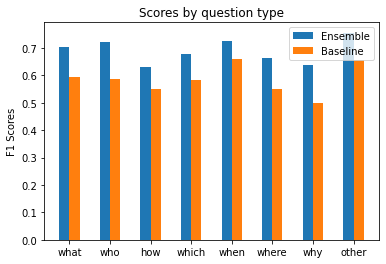

In [25]:
# plt.plot(f1_scores)
# plt.xlabel(x_axis)

# plt.plot(base_f1_scores)
# plt.xlabel(x_axis)

# base_pred = {'How': {'AvNA': 0.5375939849624061,
# 'EM': 0.5375939849624061,
# 'F1': 0.5375939849624061,
# 'count': 532},
# 'Other': {'AvNA': 0.5544989027066569,
# 'EM': 0.5544989027066569,
# 'F1': 0.5544989027066569,
# 'count': 1367},
# 'What': {'AvNA': 0.5738697045211819,
# 'EM': 0.5738697045211819,
# 'F1': 0.5738697045211819,
# 'count': 2809},
# 'When': {'AvNA': 0.6643990929705216,
# 'EM': 0.6643990929705216,
# 'F1': 0.6643990929705216,
# 'count': 441},
# 'Where': {'AvNA': 0.5474137931034483,
# 'EM': 0.5474137931034483,
# 'F1': 0.5474137931034483,
# 'count': 232},
# 'Who': {'AvNA': 0.580327868852459,
# 'EM': 0.580327868852459,
# 'F1': 0.580327868852459,
# 'count': 610},
# 'Why': {'AvNA': 0.41379310344827586,
# 'EM': 0.41379310344827586,
# 'F1': 0.41379310344827586,
# 'count': 87}}

# model_pred = {'How': {'AvNA': 0.6033834586466166,
# 'EM': 0.6033834586466166,
# 'F1': 0.6033834586466166,
# 'count': 532},
# 'Other': {'AvNA': 0.6232626188734455,
# 'EM': 0.6232626188734455,
# 'F1': 0.6232626188734455,
# 'count': 1367},
# 'What': {'AvNA': 0.6589533641865433,
# 'EM': 0.6589533641865433,
# 'F1': 0.6589533641865433,
# 'count': 2809},
# 'When': {'AvNA': 0.7414965986394558,
# 'EM': 0.7414965986394558,
# 'F1': 0.7414965986394558,
# 'count': 441},
# 'Where': {'AvNA': 0.6422413793103449,
# 'EM': 0.6422413793103449,
# 'F1': 0.6422413793103449,
# 'count': 232},
# 'Who': {'AvNA': 0.7081967213114754,
# 'EM': 0.7081967213114754,
# 'F1': 0.7081967213114754,
# 'count': 610},
# 'Why': {'AvNA': 0.5977011494252874,
# 'EM': 0.5977011494252874,
# 'F1': 0.5977011494252874,
# 'count': 87}}


# x_axis = ['Who','What','How','When','Where','Why', 'Other']
# f1_scores = [model_pred[q]['F1'] * 100 for q in x_axis] 
# base_f1_scores = [base_pred[q]['F1'] * 100 for q in x_axis] 
# # print(f1_scores)


f1_scores = [ f1_scores[i] for i in range(len(f1_scores))]
base_f1_scores = [ base_f1_scores[i] for i in range(len(base_f1_scores))]

fig = plt.figure()
X = np.arange(len(x_axis))
width=0.25
plt.bar(X, f1_scores, width=width, label='Ensemble')
plt.bar(X + 0.25, base_f1_scores, width=width, label = 'Baseline')
plt.ylabel('F1 Scores')
plt.title('Scores by question type')
plt.xticks(X + width / 2, x_axis)
plt.legend(loc='best')
plt.show()


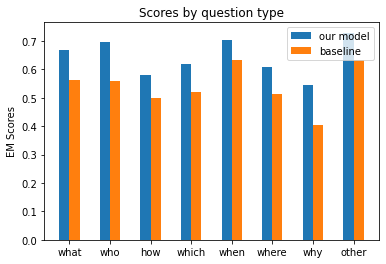

In [26]:
# plt.plot(em_scores)
# plt.plot(base_em_scores)
# plt.xlabel(x_axis)



fig = plt.figure()
X = np.arange(len(x_axis))
width=0.25
plt.bar(X, em_scores, width=width, label='our model')
plt.bar(X + 0.25, base_em_scores, width=width, label = 'baseline')
plt.ylabel('EM Scores')
plt.title('Scores by question type')
plt.xticks(X + width / 2, x_axis)
plt.legend(loc='best')
plt.show()

Text(0.5, 0, "['what', 'who', 'how', 'which', 'when', 'where', 'why', 'other']")

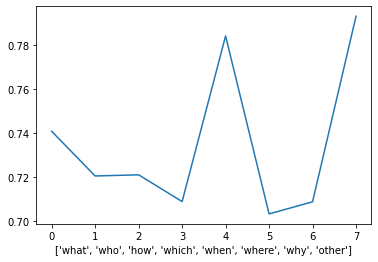

In [46]:
plt.plot(avna_scores)
plt.xlabel(x_axis)

In [11]:
bidaf_list = question_type_analysis('predictions_bidaf_prob.json')

Exact Match: 58.3950617284
F1:  65.9768945791
Question and dist are:  what 0.583025830258 271
Question and dist are:  who 0.561497326203 187
Question and dist are:  how 0.646258503401 147
Question and dist are:  which 0.528571428571 70
Question and dist are:  when 0.62962962963 27
Question and dist are:  where 0.578947368421 19
Question and dist are:  in 0.842105263158 19
Question and dist are:  on 0.545454545455 11


In [12]:
rnet_list = question_type_analysis('predictions_rnet_prob.json')

Exact Match: 56.2962962963
F1:  64.6540487188
Question and dist are:  what 0.494464944649 271
Question and dist are:  who 0.561497326203 187
Question and dist are:  how 0.659863945578 147
Question and dist are:  which 0.514285714286 70
Question and dist are:  when 0.814814814815 27
Question and dist are:  where 0.473684210526 19
Question and dist are:  in 0.842105263158 19
Question and dist are:  on 0.727272727273 11


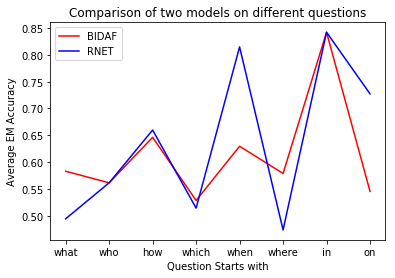

In [14]:
main_ques = ['what','who','how','which','when','where','in','on']
import numpy as np
X = np.arange(8)
import matplotlib.pyplot as plt
% matplotlib inline

fig=plt.figure() #Creates a new figure
ax1=fig.add_subplot(111) #Plot with: 1 row, 1 column, first subplot.

line1 = ax1.plot(main_ques, bidaf_list, '-r', label='BIDAF')
line2 = ax1.plot(main_ques, rnet_list, '-b', label='RNET')
# plt.axis('equal')

plt.legend()
# plt.figsize(10,10)

# plt.bar(main_ques, bidaf_list, 'red', main_ques, rnet_list, 'blue')
plt.ylabel('Average EM Accuracy')
# # plt.plot(main_ques,rnet_list, color='blue')
# # plt.axis(main_ques)
plt.xlabel('Question Starts with')
plt.title('Comparison of two models on different questions')
plt.savefig('plots/question_type.png')
plt.show()

### By Answer Length

In [63]:
def answer_len_analysis(pred_file):

    predictions = load_pred(pred_file)
    output_dict, dict_ques = eval_dicts(dataset, predictions, 1)
    #print(dict_ques)
    #dict_ques = json.loads(output_dict)
    
    keys = list(dict_ques.keys())
    ans_len_dist = {}
    for i in range(len(dict_ques)):
        ques = keys[i]
        ans_len = len(predictions[ques])
    #     print(fw)
        if ans_len in ans_len_dist:
            ans_len_dist[ans_len] +=1
        else:
            ans_len_dist[ans_len] = 1
    
    len_response_dist = {}
    for i in range(len(dict_ques)):
        ques = keys[i]
        ans_len = len(predictions[ques])
        ans = dict_ques[ques]['F1']
    #     print(fw, ans)
        if ans_len in len_response_dist:
            len_response_dist[ans_len] += ans
        else:
            len_response_dist[ans_len] = ans
            
            
    d4 = dict((k, float(len_response_dist[k]) / ans_len_dist[k]) for k in ans_len_dist)
    list1 = []
    # main_ques = [0,1,2,3,4,5]
    # for ques in main_ques:
    #     print("Question and dist are: ", ques, d4[ques], ans_len_dist[ques])
    #     list1.append(d4[ques])
    # return list1
    return ans_len_dist

In [65]:
ans_len_dist = answer_len_analysis(baseline_file)
print(ans_len_dist)

# 0, 1-4, 5-9, 10-20, 20+
base_ans_len_final = []

base_ans_len_final.append(ans_len_dist[0])



{70: 4, 8: 126, 0: 2293, 15: 135, 16: 129, 65: 4, 22: 71, 34: 20, 18: 102, 51: 10, 7: 164, 57: 5, 3: 115, 6: 131, 9: 178, 14: 135, 55: 10, 37: 22, 31: 29, 24: 64, 25: 53, 26: 39, 11: 181, 42: 14, 13: 131, 4: 348, 40: 16, 47: 9, 17: 107, 20: 78, 27: 54, 21: 71, 19: 79, 23: 60, 10: 133, 5: 110, 29: 36, 32: 26, 12: 185, 56: 6, 41: 13, 44: 28, 45: 14, 2: 58, 77: 2, 35: 25, 53: 6, 69: 7, 28: 39, 30: 38, 33: 25, 43: 12, 39: 12, 74: 5, 49: 9, 48: 15, 36: 21, 100: 1, 76: 4, 62: 6, 38: 12, 87: 2, 66: 5, 61: 6, 59: 5, 50: 11, 52: 14, 46: 9, 68: 4, 71: 6, 63: 1, 1: 4, 73: 4, 58: 6, 64: 6, 78: 4, 75: 4, 80: 3, 82: 3, 54: 4, 79: 3, 85: 1, 89: 2, 67: 5, 90: 1, 84: 1, 60: 1, 81: 1}


In [53]:
qanet_list = answer_len_analysis(pred_file)

Question and dist are:  0 0.8190094683175528 2746
Question and dist are:  1 0.8 5
Question and dist are:  2 0.4144088669950739 58
Question and dist are:  3 0.519345238095238 112
Question and dist are:  4 0.6577707454289733 316
Question and dist are:  5 0.6155963302752293 109


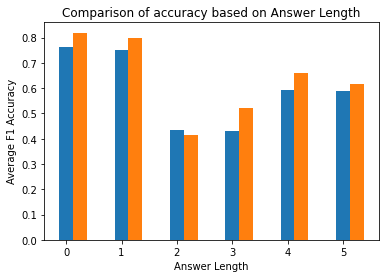

In [62]:
main_ques = np.array([0,1,2,3,4,5])
import numpy as np
X = np.arange(8)
import matplotlib.pyplot as plt
% matplotlib inline

fig=plt.figure() #Creates a new figure
ax1=fig.add_subplot(111) #Plot with: 1 row, 1 column, first subplot.

#line1 = ax1.plot(main_ques, bidaf_list, '-r', label='BIDAF')
#line2 = ax1.plot(main_ques, qanet_list, '-b', label='QANET')
# plt.axis('equal')
#plt.xticks(range(1,len(main_ques)+1), main_ques, size='small')

#plt.legend()
# plt.figsize(10,10)

plt.bar(main_ques, bidaf_list, width= 0.25, label = 'BIDAF')
plt.bar(main_ques+0.25, qanet_list, width= 0.25, label = 'QANET')
plt.ylabel('Average F1 Accuracy')
# # plt.plot(main_ques,rnet_list, color='blue')
# # plt.axis(main_ques)
plt.xlabel('Answer Length')
plt.title('Comparison of accuracy based on Answer Length')
plt.savefig('answer_length.png')
plt.show()
